In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df =pd.read_csv("players_21.csv")
pd.set_option('display.max_row',None)
pd.set_option('display.max_columns',None)

In [4]:
df.head(5)


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 15.3+ MB


data cleanning & wrangling

In [6]:
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.isnull().sum().sort_values(ascending=False).head(100))

(18944, 106)
Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)
sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club_name                      object
league_name                    object
league_rank                   float64
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot

In [7]:
df["joined"] = pd.to_datetime(df["joined"], errors='coerce', dayfirst=True)
df["dob"] = pd.to_datetime(df["dob"], errors='coerce', dayfirst=True)
df["contract_valid_until"] = pd.to_datetime(df["contract_valid_until"], errors='coerce', dayfirst=True)

In [8]:
threshold = 75
cols_to_keep = df.columns[df.isnull().mean()*100 <= threshold]
df = df[cols_to_keep]

In [9]:
missing = df.isnull().mean()*100
cols_to_drop_rows = missing[missing < 3].index
df.dropna(subset=cols_to_drop_rows, inplace=True)

In [10]:
cols_to_fill_median = ["release_clause_eur", "team_jersey_number", "pace", "shooting", 
                       "passing", "dribbling", "defending", "physic"]
for col in cols_to_fill_median:
    df[col].fillna(df[col].median(), inplace=True)

In [11]:
df["player_traits"].fillna("Unknown", inplace=True)

In [12]:
df["joined"].fillna(method="ffill", inplace=True)
df["joined"].fillna(method="bfill", inplace=True)

In [13]:
def convert_value(value):
    if isinstance(value, str):
        value = value.replace('€','').replace('K','000').replace('M','000000')
    try:
        return float(value)
    except:
        return np.nan

df['wage_eur'] = df['wage_eur'].apply(convert_value)
df['value_eur'] = df['value_eur'].apply(convert_value)
df['release_clause_eur'] = df['release_clause_eur'].apply(convert_value)

In [14]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers(df, 'age')
df = remove_outliers(df, 'overall')

In [15]:
df['nationality'] = df['nationality'].str.strip().str.title()
df['player_positions'] = df['player_positions'].str.upper()

In [16]:
print("Number of duplicate records", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of duplicate records 0


In [17]:
cols_to_int = ["pace", "shooting", "passing", "dribbling", "defending", "physic", "team_jersey_number"]
df[cols_to_int] = df[cols_to_int].astype(int)

In [18]:
missing = df.isnull().sum().reset_index()
missing.columns = ['Column', 'MissingValues']
missing['MissingPercent'] = (missing['MissingValues']/len(df))*100
missing['DataType'] = missing['Column'].apply(lambda x: df[x].dtype)
missing = missing[['Column','MissingValues','MissingPercent','DataType']]
missing

,Column,MissingValues,MissingPercent,DataType
0,sofifa_id,0,0.0,int64
1,player_url,0,0.0,object
2,short_name,0,0.0,object
3,long_name,0,0.0,object
4,age,0,0.0,int64
5,dob,0,0.0,datetime64[ns]
6,height_cm,0,0.0,int64
7,weight_kg,0,0.0,int64
8,nationality,0,0.0,object
9,club_name,0,0.0,object


In [19]:
df = df[df['wage_eur'] > 0]
df = df[df['value_eur'] > 0]

In [20]:
print(df.isnull().sum())

sofifa_id                     0
player_url                    0
short_name                    0
long_name                     0
age                           0
dob                           0
height_cm                     0
weight_kg                     0
nationality                   0
club_name                     0
league_name                   0
league_rank                   0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
player_positions              0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
body_type                     0
real_face                     0
release_clause_eur            0
team_position                 0
team_jersey_number            0
joined                        0
contract_valid_until          0
pace                          0
shooting                      0
passing 

In [21]:
print(df.dtypes)

sofifa_id                              int64
player_url                            object
short_name                            object
long_name                             object
age                                    int64
dob                           datetime64[ns]
height_cm                              int64
weight_kg                              int64
nationality                           object
club_name                             object
league_name                           object
league_rank                          float64
overall                                int64
potential                              int64
value_eur                            float64
wage_eur                             float64
player_positions                      object
preferred_foot                        object
international_reputation               int64
weak_foot                              int64
skill_moves                            int64
work_rate                             object
body_type 

In [22]:
print(df[['wage_eur','value_eur','release_clause_eur']].head(10))

     wage_eur   value_eur  release_clause_eur
140  135000.0  36000000.0          81000000.0
141  135000.0  36000000.0          81000000.0
142  175000.0  35500000.0          79900000.0
143   46000.0  30500000.0          66300000.0
144   57000.0  25500000.0          45300000.0
145   52000.0  25500000.0          45300000.0
146   93000.0  31000000.0          59700000.0
147  105000.0  34500000.0          68100000.0
148  160000.0  30500000.0          64800000.0
149  115000.0  30500000.0          60200000.0


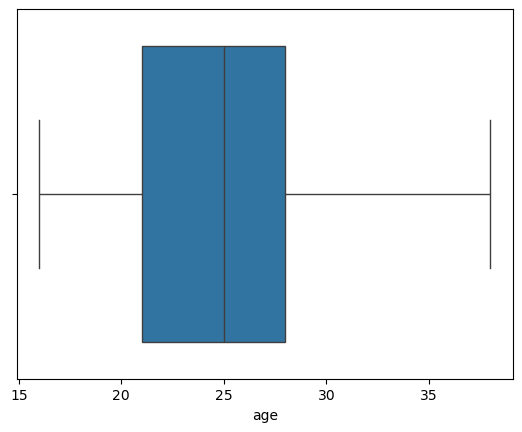

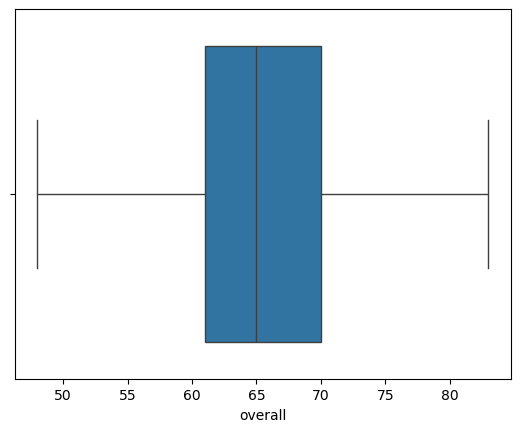

In [23]:
sns.boxplot(x=df['age'])
plt.show()

sns.boxplot(x=df['overall'])
plt.show()

In [24]:
print("Number of duplicate records", df.duplicated().sum())

Number of duplicate records 0


In [25]:
df[cols_to_int].head()

,pace,shooting,passing,dribbling,defending,physic,team_jersey_number
140,86,74,78,79,77,80,15
141,78,75,84,85,58,63,21
142,92,77,77,87,36,56,11
143,84,61,78,80,79,70,14
144,68,54,58,63,56,66,1


In [26]:
print(df['age'].min(), df['age'].max())      
print(df['overall'].min(), df['overall'].max())  

16 38
48 83


EDA

In [27]:
print("\nSummary Statistics:\n", df[['age','overall','potential','wage_eur','value_eur']].describe())


Summary Statistics:
                 age       overall     potential       wage_eur     value_eur
count  18511.000000  18511.000000  18511.000000   18511.000000  1.851100e+04
mean      25.116255     65.492680     70.989790    7758.259954  1.960931e+06
std        4.617432      6.784308      5.948142   14116.624073  3.535669e+06
min       16.000000     48.000000     48.000000     500.000000  5.000000e+03
25%       21.000000     61.000000     67.000000    1000.000000  3.000000e+05
50%       25.000000     65.000000     71.000000    3000.000000  6.500000e+05
75%       28.000000     70.000000     75.000000    7000.000000  1.700000e+06
max       38.000000     83.000000     93.000000  190000.000000  3.600000e+07


Q1- Which countries produce the best players (highest overall)?
---


Top 10 Countries by Average Overall:
 nationality
Brazil            70.665513
Czech Republic    69.864865
Portugal          69.463768
Croatia           69.069231
Spain             68.966667
Serbia            68.666667
Italy             68.401460
Greece            67.801980
Argentina         67.601520
Ghana             67.512821
Name: overall, dtype: float64


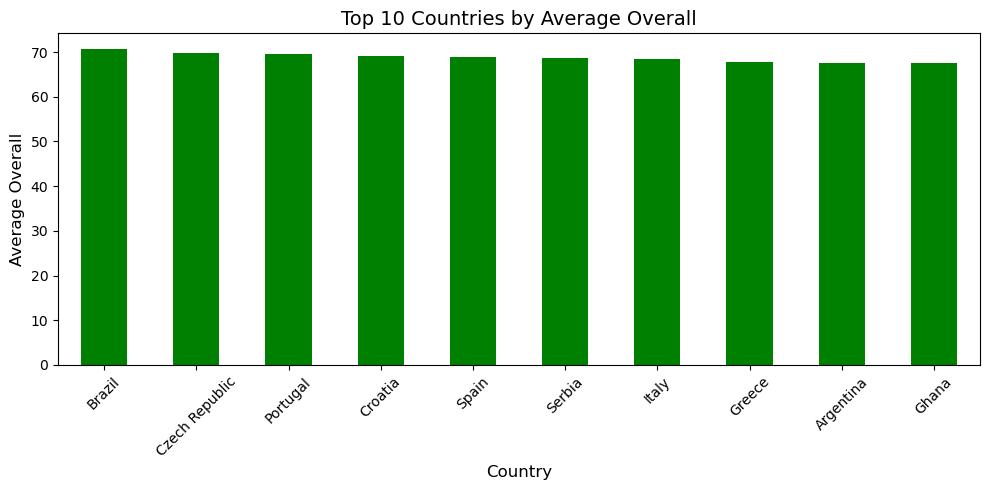

In [29]:
import matplotlib.pyplot as plt

country_counts = df['nationality'].value_counts()
valid_countries = country_counts[country_counts >= 100].index

top_countries = (
    df[df['nationality'].isin(valid_countries)]
    .groupby('nationality')['overall']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Countries by Average Overall:\n", top_countries)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries by Average Overall', fontsize=14)
plt.ylabel('Average Overall', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q2 - What is the relationship between age, potential, and market value?
---


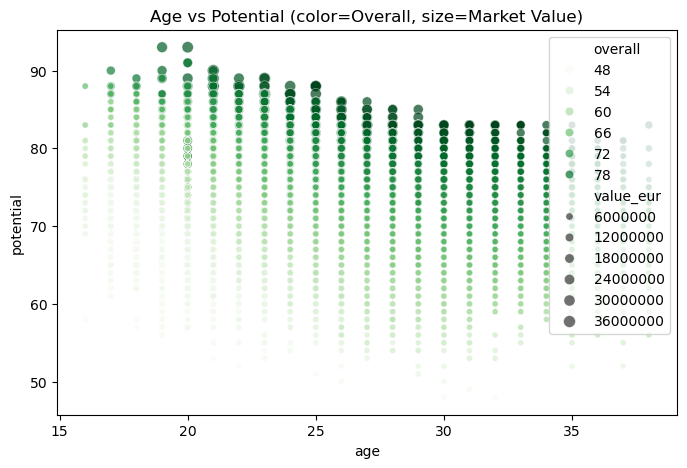

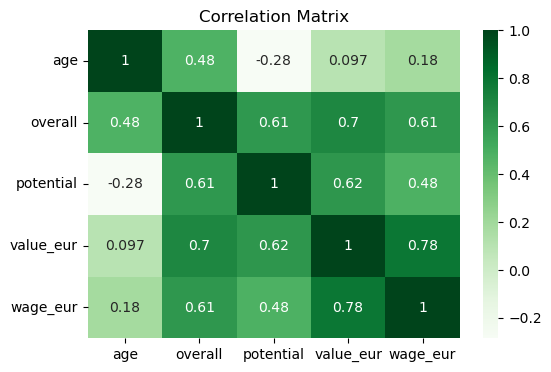

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df, 
    x='age', 
    y='potential', 
    hue='overall',      
    palette='Greens',  
    size='value_eur', 
    alpha=0.7
)
plt.title('Age vs Potential (color=Overall, size=Market Value)')
plt.show()

corr = df[['age','overall','potential','value_eur','wage_eur']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(
    corr, 
    annot=True, 
    cmap='Greens'  
)
plt.title('Correlation Matrix')
plt.show()


In [30]:
print(df.columns)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'team_position', 'team_jersey_number', 'joined',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', '

Q3 - Which clubs have the most valuable squads?
---



Top 10 Clubs by Squad Value:
 club_name
Tottenham Hotspur      392525000.0
Chelsea                364775000.0
Sevilla FC             346875000.0
Arsenal                338800000.0
Atlético Madrid        337000000.0
Manchester United      325630000.0
RB Leipzig             318220000.0
Real Madrid            314350000.0
Napoli                 312650000.0
Bayer 04 Leverkusen    303525000.0
Name: value_eur, dtype: float64


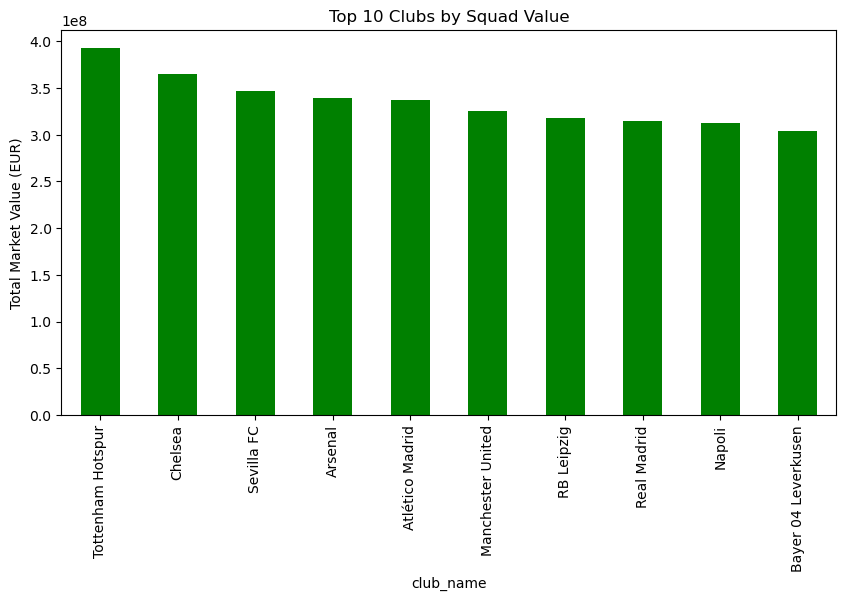

In [33]:
top_clubs = df.groupby('club_name')['value_eur'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Clubs by Squad Value:\n", top_clubs)

top_clubs.plot(kind='bar', figsize=(10,5), color='green')
plt.title('Top 10 Clubs by Squad Value')
plt.ylabel('Total Market Value (EUR)')
plt.show()


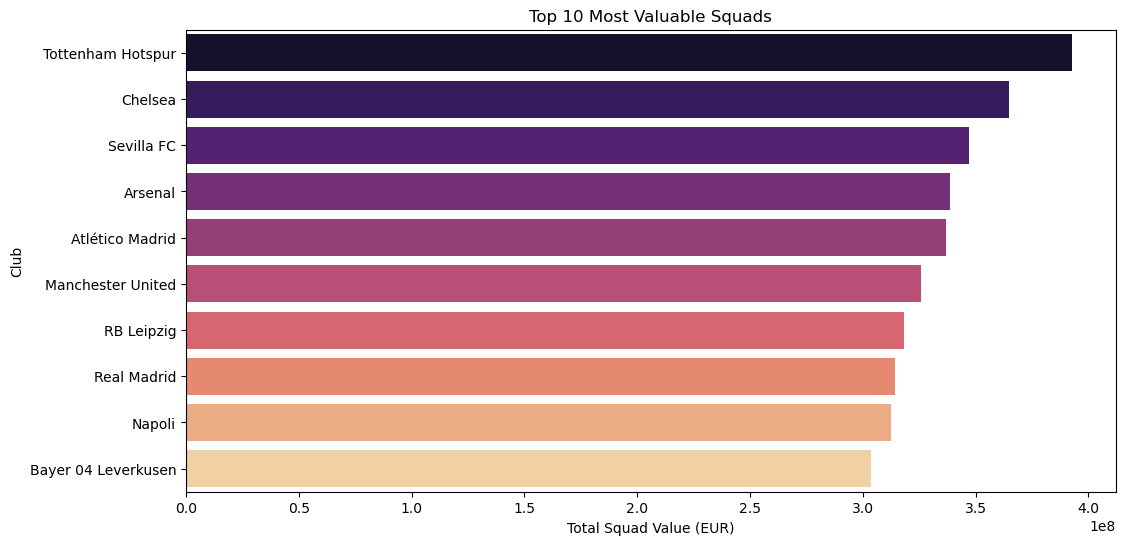

In [32]:

plt.figure(figsize=(12,6))
sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='magma')
plt.xlabel('Total Squad Value (EUR)')
plt.ylabel('Club')
plt.title('Top 10 Most Valuable Squads')
plt.show()

Extra visualizations
---
Visualize the distributions of age, overall rating, market value (EUR), and wage (EUR)

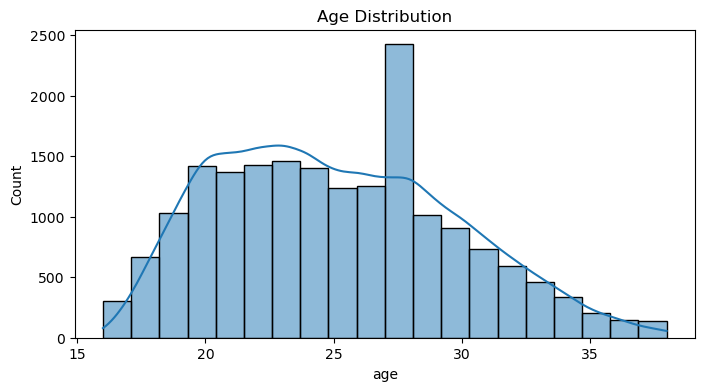

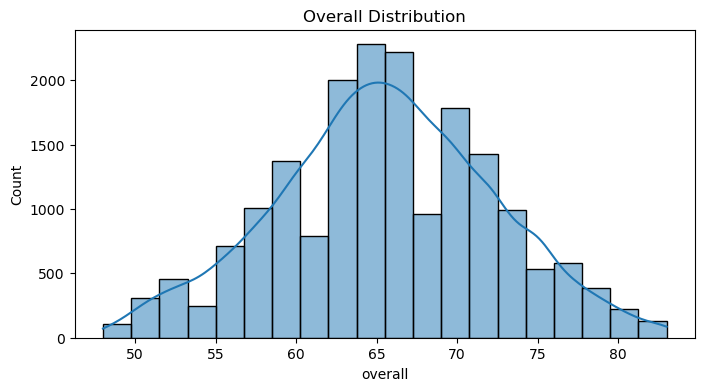

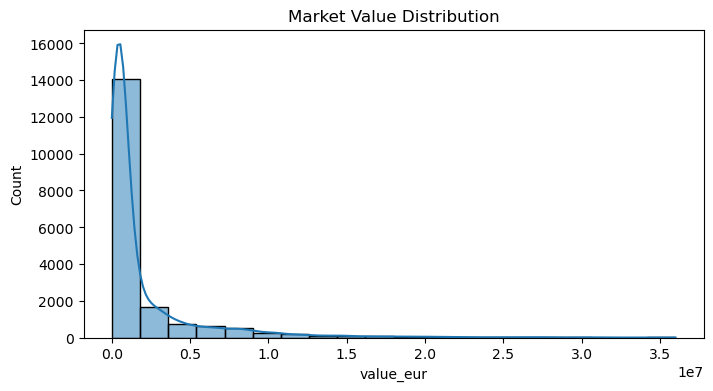

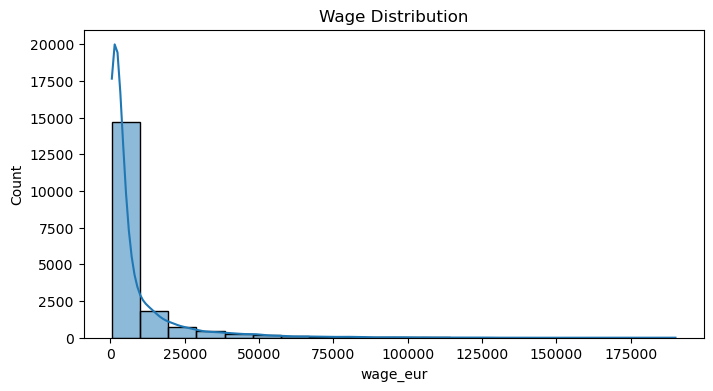

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['overall'], bins=20, kde=True)
plt.title('Overall Distribution')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['value_eur'], bins=20, kde=True)
plt.title('Market Value Distribution')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['wage_eur'], bins=20, kde=True)
plt.title('Wage Distribution')
plt.show()

Which player positions have the highest average overall rating?
---


Average Overall by Main Position:
 main_position
CF     67.186916
CDM    66.763946
LM     66.506173
LW     66.378378
RB     66.364110
RM     66.080229
LB     66.045852
RWB    65.818182
RW     65.757009
CAM    65.488769
CB     65.449481
LWB    65.310000
ST     65.107129
CM     64.345752
GK     64.257470
Name: overall, dtype: float64


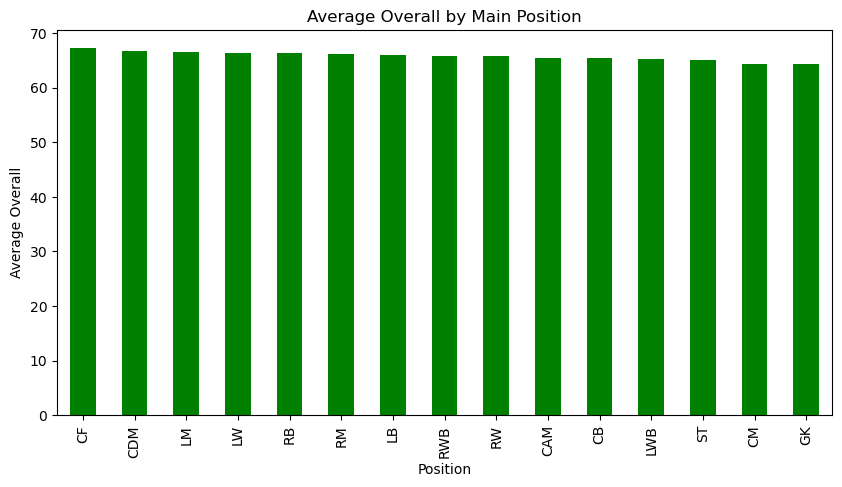

In [34]:
df['main_position'] = df['player_positions'].apply(lambda x: x.split(',')[0].strip())
position_stats = df.groupby('main_position')['overall'].mean().sort_values(ascending=False)

print("\nAverage Overall by Main Position:\n", position_stats)
plt.figure(figsize=(10,5))
position_stats.plot(kind='bar', color='green')
plt.title('Average Overall by Main Position')
plt.xlabel('Position')
plt.ylabel('Average Overall')
plt.show()

How many players play in each main position
---


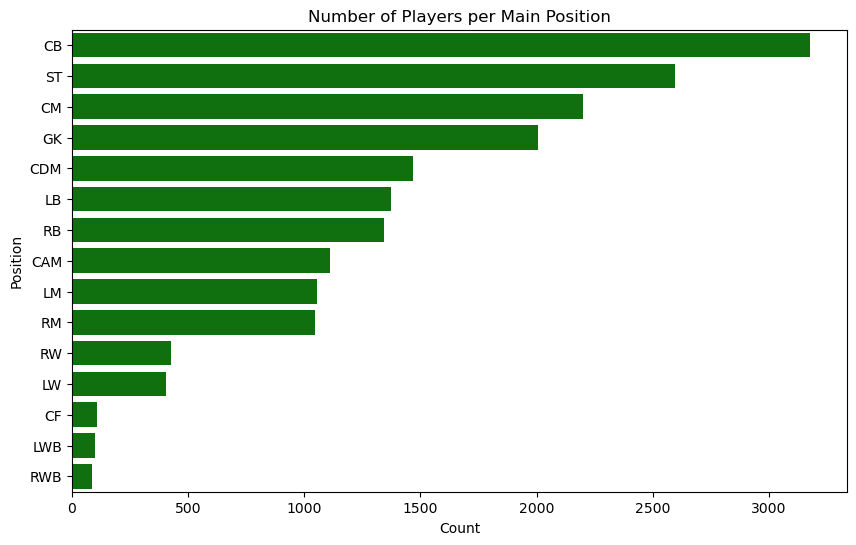

In [37]:
df['main_position'] = df['player_positions'].apply(lambda x: x.split(',')[0].strip())

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='main_position', order=df['main_position'].value_counts().index, color='green')
plt.title('Number of Players per Main Position')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

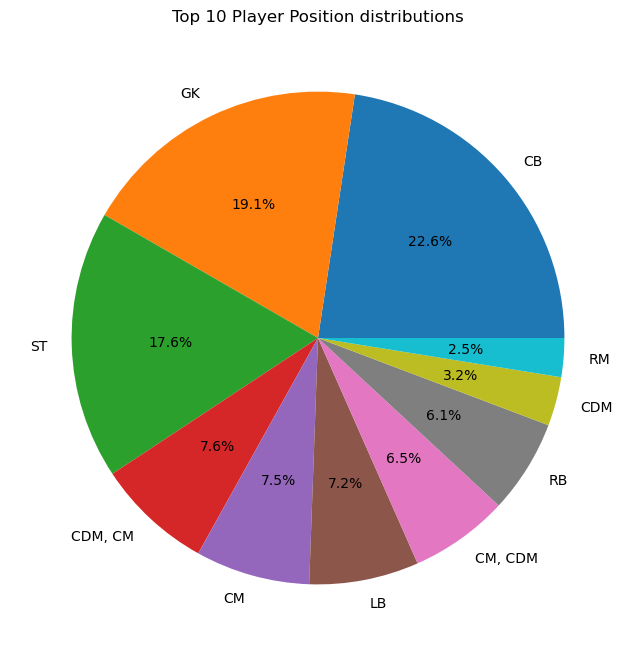

In [36]:
plt.figure(figsize=(8,8))
df['player_positions'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Player Position distributions')
plt.ylabel('')
plt.show()